<div align="center">
  <h1><b> Quantum Information </b></h1>
  <h2> GHZ State </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [The Maximally Entangled $n$-Qudit GHZ State](#the-maximally-entangled-n-qudit-ghz-state)
- [Particular Cases with Qiskit](#particular-cases-with-qiskit)
  - $n$-qubit
  - $3$-qubit
- [GHZ-like State](#ghz-like-state)

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [2]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

# The Maximally Entangled $n$-Qudit GHZ State

The Greenberger-Horne-Zeilinger (GHZ) is a maximally entangled quantum state of at least three **qudits** defined as:

$$|GHZ \rangle^{nqd} = \frac{1}{\sqrt d} \sum_{j=0}^{d-1} |jj \cdots j\rangle.$$

- Each qudit is of dimention $d$ with basis set $\{|0\rangle, |1\rangle, \cdots, |d-1\rangle \}$.

The maximally entangled GHZ state of $n$ **qutrits** is defined by:

$$|GHZ\rangle^{nqtrit} = \frac{1}{\sqrt 3}(|00 \cdots 0\rangle + |11 \cdots 1\rangle + |22 \cdots 2\rangle).$$

# Particular Cases with Qiskit

## $n$-qubit

The maximally entangled GHZ state of $n$ **qubits** is defined by:

$$|GHZ\rangle^{nqb} = \frac{1}{\sqrt 2}(|00 \cdots 0\rangle + |11 \cdots 1\rangle).$$

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


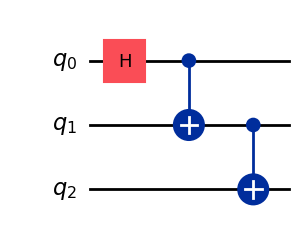

In [11]:
def nGHZ(n):
    qc = QuantumCircuit(n) 
    qc.h([0])
    for j in range(0, n-1):
        qc.cx(j, j+1)
    print(Statevector.from_instruction(qc))
    return qc

qc = nGHZ(3)
qc.draw("mpl") 

## $3$-qubit

The maximally entangled GHZ state of three qubits is defined by:

$$|GHZ\rangle^{3qb}_{ABC} \doteq \frac{1}{\sqrt 2} \left ( |000\rangle_{ABC} +  |111\rangle_{ABC} \right ).$$

For three qubits, $GHZ$ and $W$ states cannot be transformed into one another by stochastic local operations and classical communications (SLOCC):

\begin{align}
|GHZ\rangle^{3qb}_{ABC} &\doteq \frac{1}{\sqrt 2} \left ( |000\rangle_{ABC} +  |111\rangle_{ABC} \right ),\\
|W\rangle^{3qb}_{ABC} &\doteq \frac{1}{\sqrt 3} \left ( |001\rangle_{ABC} +  |010\rangle_{ABC} + |100\rangle_{ABC} \right).
\end{align} 

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


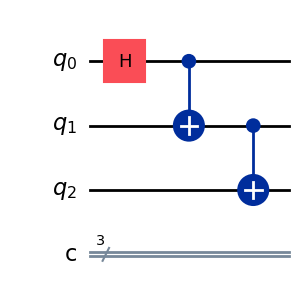

In [6]:
def GHZ():
    qc = QuantumCircuit(3,3) 
    qc.h([0]), qc.cx(0,1), qc.cx(1,2)
    print(Statevector.from_instruction(qc))
    return qc

qc = GHZ()
qc.draw("mpl") 

Measurement results: {'111 000': 524, '000 000': 500}


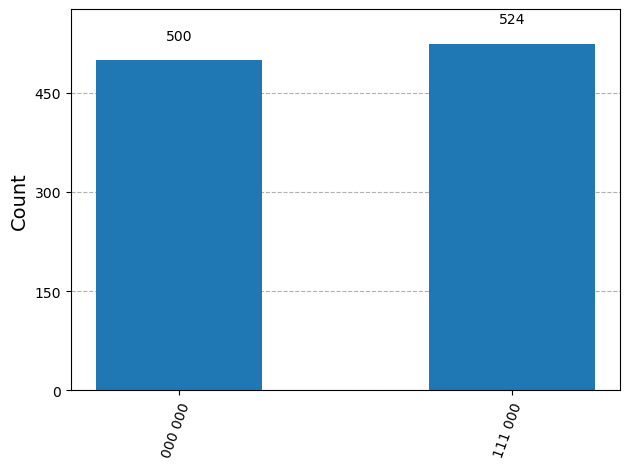

In [7]:
qc.measure_all()                            # Measuring all qubits. A quantum computer always measures in the computational basis.
backend = Aer.get_backend('qasm_simulator') # Define the Backend for the simulator.
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Measurement results:", counts)                             
plot_histogram(counts)                      # Plot a histogram of outcomes and corresponding probabilities.

# GHZ-like State

A GHZ-like state is the following:

$$|\psi \rangle = \frac{1}{\sqrt2}(|011\rangle - |100\rangle).$$

Statevector([ 0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))


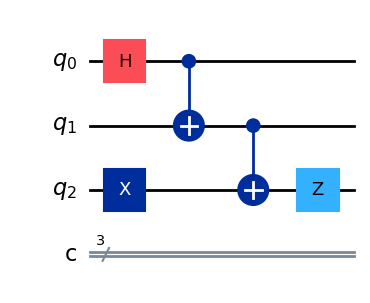

In [8]:
def GHZ_Like():
    qc = QuantumCircuit(3,3) 
    qc.h([0]), qc.x(2), qc.cx(0,1), qc.cx(1,2), qc.z(2)
    print(Statevector.from_instruction(qc))
    return qc

qc = GHZ_Like()
qc.draw("mpl") 

In [9]:
# Build tensor products:
state1 = Statevector.from_label('011')  # |011>
state2 = Statevector.from_label('100')  # |100>

# Create GHZ-like superposition state:
ghz_state = (1/np.sqrt(2)) * (state1.data - state2.data)

print(ghz_state)

[ 0.        +0.j  0.        +0.j  0.        +0.j  0.70710678+0.j
 -0.70710678+0.j  0.        +0.j  0.        +0.j  0.        +0.j]


Measurement results: {'100 000': 512, '011 000': 512}


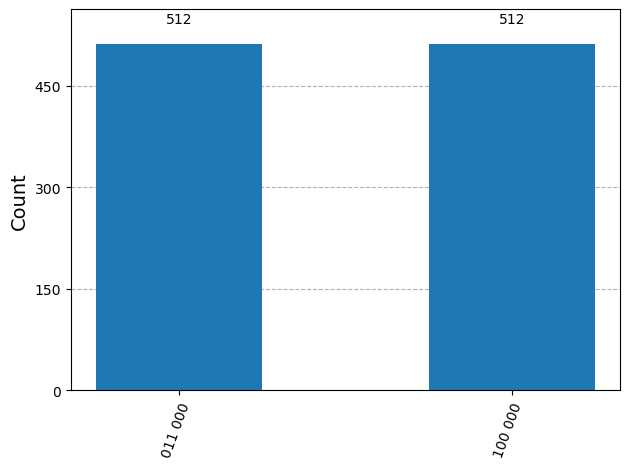

In [10]:
qc.measure_all()                            # Measuring all qubits. A quantum computer always measures in the computational basis.
backend = Aer.get_backend('qasm_simulator') # Define the Backend for the simulator.
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)
print("Measurement results:", counts)                             
plot_histogram(counts)                      # Plot a histogram of outcomes and corresponding probabilities.

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 

[2] https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state